In [2]:
from google.colab import files

df = files.upload()

Saving fake_reg.csv to fake_reg.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


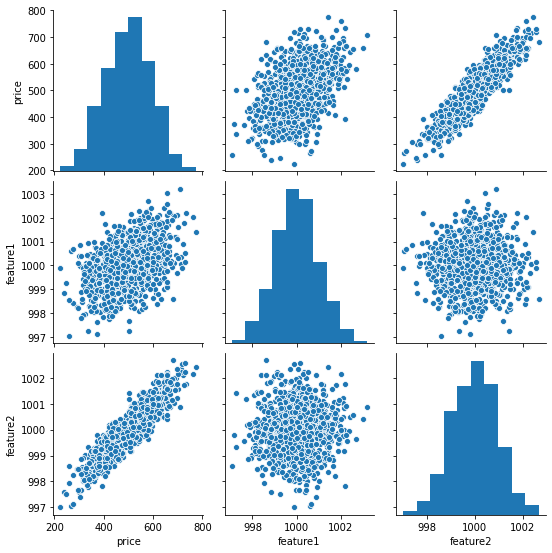

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X =df[['feature1','feature2']].values
y=df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [11]:
# normalize or scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')
model.fit(x=X_train,y=y_train,epochs=250,verbose=2)

Epoch 1/250
22/22 - 0s - loss: 256704.5312
Epoch 2/250
22/22 - 0s - loss: 256641.5938
Epoch 3/250
22/22 - 0s - loss: 256583.4531
Epoch 4/250
22/22 - 0s - loss: 256516.3125
Epoch 5/250
22/22 - 0s - loss: 256439.9375
Epoch 6/250
22/22 - 0s - loss: 256352.5938
Epoch 7/250
22/22 - 0s - loss: 256253.5156
Epoch 8/250
22/22 - 0s - loss: 256138.7031
Epoch 9/250
22/22 - 0s - loss: 256009.2344
Epoch 10/250
22/22 - 0s - loss: 255862.3125
Epoch 11/250
22/22 - 0s - loss: 255698.4062
Epoch 12/250
22/22 - 0s - loss: 255516.6406
Epoch 13/250
22/22 - 0s - loss: 255313.8906
Epoch 14/250
22/22 - 0s - loss: 255087.4688
Epoch 15/250
22/22 - 0s - loss: 254836.4062
Epoch 16/250
22/22 - 0s - loss: 254557.4375
Epoch 17/250
22/22 - 0s - loss: 254245.7812
Epoch 18/250
22/22 - 0s - loss: 253899.8125
Epoch 19/250
22/22 - 0s - loss: 253519.0781
Epoch 20/250
22/22 - 0s - loss: 253100.7031
Epoch 21/250
22/22 - 0s - loss: 252642.3594
Epoch 22/250
22/22 - 0s - loss: 252145.9844
Epoch 23/250
22/22 - 0s - loss: 251602.45

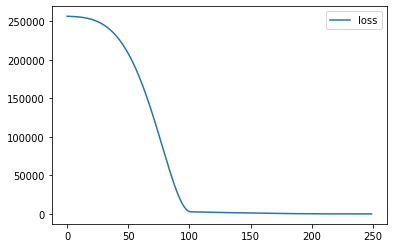

In [14]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [15]:
model.evaluate(X_test,y_test,verbose=0)

26.80367088317871

In [16]:
model.evaluate(X_train,y_train,verbose=0)

24.550539016723633

In [24]:
test_predictions=model.predict(X_test)
test_predictions=pd.Series(test_predictions.reshape(300,))
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns=['Test True Y','Model Predictions']
pred_df


,Test True Y,Model Predictions
0,402.296319,406.508606
1,624.156198,624.756287
2,582.455066,593.275879
3,578.588606,573.609924
4,371.224104,368.154449
...,...,...
295,525.704657,530.404846
296,502.909473,517.069336
297,612.727910,610.832397
298,417.569725,418.024078


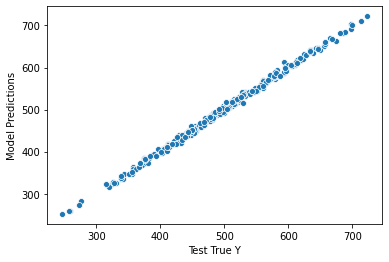

In [25]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.203749409641492

In [29]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.177226437684781

In [30]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [31]:
new_data=[[998,1000]]
new_data=scaler.transform(new_data)
model.predict(new_data)

array([[421.2015]], dtype=float32)

In [34]:
# To save
from tensorflow.keras.models import load_model
model.save('my_first_pred.h5')

In [35]:
latter_model=load_model('my_first_pred.h5')
model.predict(new_data)

array([[421.2015]], dtype=float32)